# Unemployment Analysis


# Problem Statement-
Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
data=pd.read_csv('Unemployment in India.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Analysis of data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
data.shape

(768, 7)

In [5]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# Data visualization

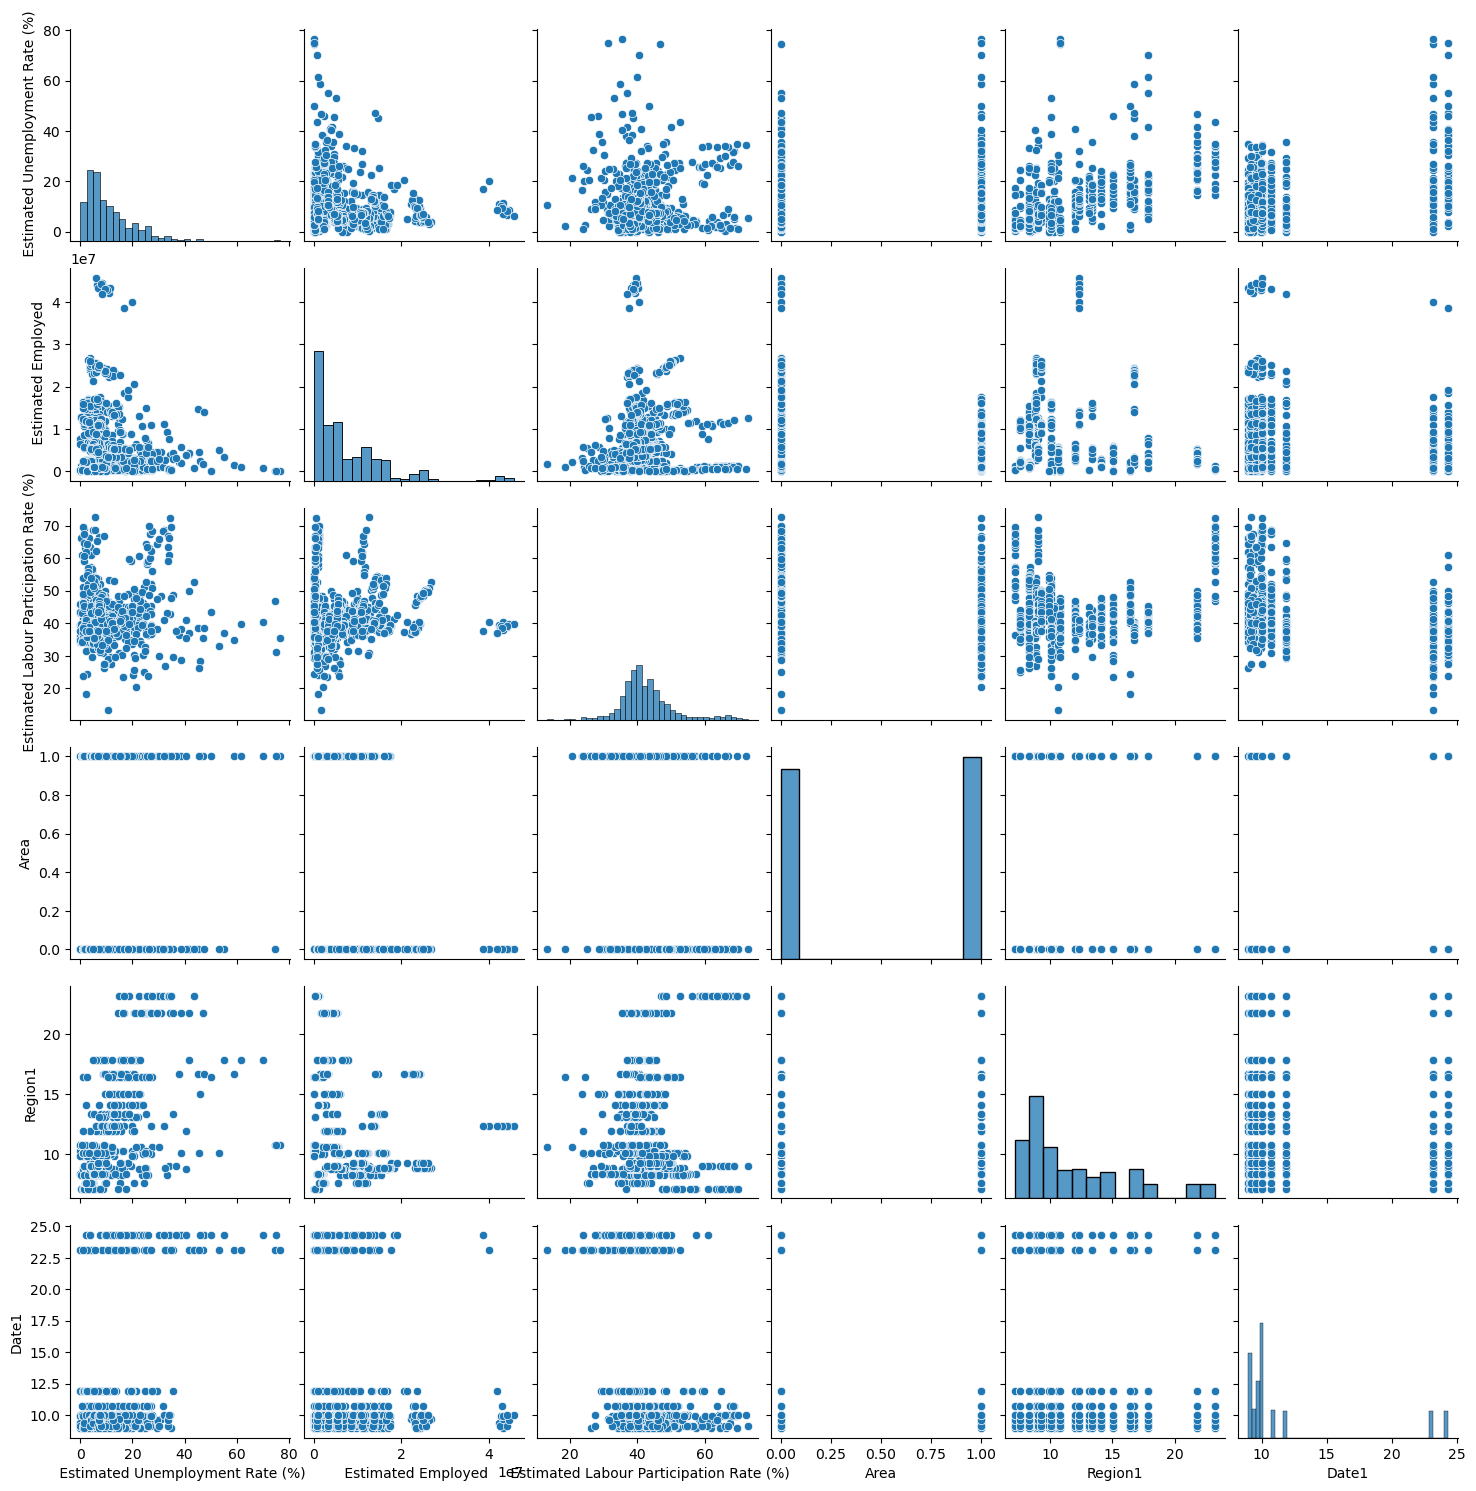

In [39]:
import seaborn as sns
sns.pairplot(data)

# Data Preprocessing

In [7]:
# dropping the null rows in data
data.dropna(inplace=True)

In [8]:
data[' Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [9]:
# all the values in the column 'Frequency' are the same so we will drop this column as it adds no value to the model
data.drop(columns=' Frequency',inplace=True)

In [10]:
data.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural


# Turning categorical features into numeric features

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Area']=le.fit_transform(data['Area'])
data.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,0
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,0
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,0
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,0
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,0


In [12]:
# for categorical variables with high cardinality we will use target encoding

In [13]:
import category_encoders as ce

encoder=ce.TargetEncoder(cols=['Region',' Date'])
data1=encoder.fit_transform(data[['Region',' Date']],data[' Estimated Unemployment Rate (%)'])

In [14]:
data['Region1']=data1['Region']
data['Date1']=data1[' Date']

In [15]:
# Now we drop the original categorical features
data.drop(columns=['Region',' Date'],inplace=True)

In [16]:
data.head()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region1,Date1
0,3.65,11999139.0,43.24,0,8.813602,8.968358
1,3.05,11755881.0,42.05,0,8.813602,9.383575
2,3.75,12086707.0,43.50,0,8.813602,9.122832
3,3.32,12285693.0,43.97,0,8.813602,9.714403
4,5.17,12256762.0,44.68,0,8.813602,9.158897


# Splitting and Scaling the dataset

In [27]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
Y=data.iloc[:,1:2]
X=data.drop(columns=' Estimated Unemployment Rate (%)')

In [28]:
from sklearn.model_selection import train_test_split as tts

xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.3,random_state=42)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((518, 5), (222, 5), (518, 1), (222, 1))

In [29]:
#scaling train and test sets
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

ytrain=scaler.fit_transform(ytrain)
ytest=scaler.transform(ytest)

# Training the model

In [30]:
from sklearn.linear_model import LinearRegression 

lr=LinearRegression()

lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)

# Performance metrics

In [31]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
print(mae(ytest,y_pred))
print(mse(ytest,y_pred))

2.7454733931732034e-16
1.2599367817665462e-31


In [32]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred)

1.0

In [33]:
lr.coef_

array([[ 1.00000000e+00, -1.15601941e-17,  2.66731630e-16,
         1.00947047e-16, -8.78349463e-17]])

In [34]:
lr.intercept_

array([3.08148791e-32])

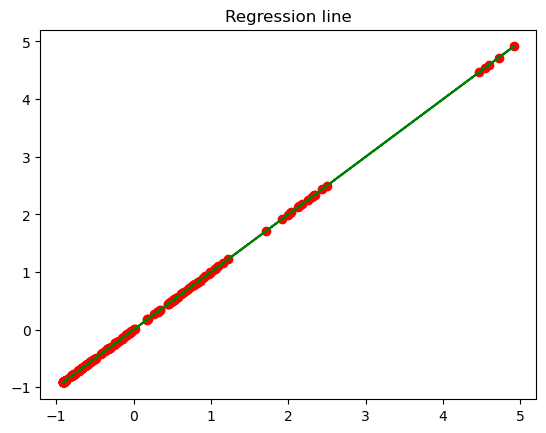

In [36]:
plt.scatter(ytest, y_pred, color = "red")
plt.plot(ytest, y_pred, color = "green")
plt.title('Regression line')
plt.show()

In [37]:
# As we see the regression line fits the data perfectly.